In [1]:
# Dependencies and Setupjj
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from functools import reduce
from scipy.optimize import minimize

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File scruboad (Remember to Change These)
data_to_load1 = "Data/AAPL.csv"
data_to_load2 = "Data/AMZN.csv"
data_to_load3 = "Data/GLOB.csv"
data_to_load4 = "Data/HES.csv"
data_to_load5 = "Data/KL.csv"
data_to_load6 = "Data/NFLX.csv"
data_to_load7 = "Data/NJR.csv"

AAPL = pd.read_csv(data_to_load1)
AMZN = pd.read_csv(data_to_load2)
GLOB = pd.read_csv(data_to_load3)
HES = pd.read_csv(data_to_load4)
KL = pd.read_csv(data_to_load5)
NFLX = pd.read_csv(data_to_load6)
NJR = pd.read_csv(data_to_load7)




In [2]:
# Add Stock name as a column before merge
AAPL['Stock']='AAPL'
AMZN['Stock']='AMZN'
GLOB['Stock']='GLOB'
HES['Stock']='HES'
KL['Stock']='KL'
NFLX['Stock']='NFLX'
NJR['Stock']='NJR'


In [3]:
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
0,2007-01-03,12.327143,12.368571,11.700000,11.971429,10.447627,309579900,AAPL
1,2007-01-04,12.007143,12.278571,11.974286,12.237143,10.679518,211815100,AAPL
2,2007-01-05,12.252857,12.314285,12.057143,12.150000,10.603467,208685400,AAPL
3,2007-01-08,12.280000,12.361428,12.182858,12.210000,10.655828,199276700,AAPL
4,2007-01-09,12.350000,13.282857,12.164286,13.224286,11.541011,837324600,AAPL
5,2007-01-10,13.535714,13.971429,13.350000,13.857142,12.093310,738220000,AAPL
6,2007-01-11,13.705714,13.825714,13.585714,13.685715,11.943705,360063200,AAPL
7,2007-01-12,13.512857,13.580000,13.318571,13.517143,11.796590,328172600,AAPL
8,2007-01-16,13.668571,13.892858,13.635715,13.871428,12.105779,311019100,AAPL
9,2007-01-17,13.937143,13.942857,13.545714,13.564285,11.837733,411565000,AAPL


In [4]:
# Combine the 7 tables
Data_All = pd.concat([
    AAPL,AMZN,GLOB,HES,KL,NFLX,NJR
],ignore_index=True)

# Data_All.columns = ['AAPL','AMZN','GLOB','HES','KL','NFLX','NJR']
# # data.head()

In [6]:
# Using Adj Closed to account for analyzes the stock's dividends 
# stock splits and new stock offerings to determine an adjusted value
Data_all2 = Data_All[['Date', 'Adj Close','Stock']]

In [7]:
Data_all2.head(10)

,Date,Adj Close,Stock
0,2007-01-03,10.447627,AAPL
1,2007-01-04,10.679518,AAPL
2,2007-01-05,10.603467,AAPL
3,2007-01-08,10.655828,AAPL
4,2007-01-09,11.541011,AAPL
5,2007-01-10,12.093310,AAPL
6,2007-01-11,11.943705,AAPL
7,2007-01-12,11.796590,AAPL
8,2007-01-16,12.105779,AAPL
9,2007-01-17,11.837733,AAPL


In [8]:
# Flip to wide format for lognormal returns
Data_piv = Data_all2.pivot(index='Date', columns='Stock', values='Adj Close')

In [9]:
Data_piv.head(20)

Stock,AAPL,AMZN,GLOB,HES,KL,NFLX,NJR
Date,,,,,,,
2007-01-03,10.447627,38.700001,NaN,41.018654,8.665471,3.801429,10.478496
2007-01-04,10.679518,38.900002,NaN,40.829033,8.318851,3.621428,10.528372
2007-01-05,10.603467,38.369999,NaN,41.328960,8.546631,3.544286,10.261641
2007-01-08,10.655828,37.500000,NaN,42.535629,8.348561,3.404286,10.153212
2007-01-09,11.541011,37.779999,NaN,41.544437,8.130687,3.427143,10.198753
2007-01-10,12.093310,37.150002,NaN,40.941090,7.833585,3.438571,10.101168
2007-01-11,11.943705,37.400002,NaN,40.777328,7.873199,3.462857,10.268146
2007-01-12,11.796590,38.200001,NaN,42.251202,8.259432,3.244286,10.292001
2007-01-16,12.105779,38.660000,NaN,41.958138,8.170300,3.248571,10.285492


In [10]:
# 
log_rtn = np.log(Data_piv/Data_piv.shift(1))
log_rtn.head(20)


Stock,AAPL,AMZN,GLOB,HES,KL,NFLX,NJR
Date,,,,,,,
2007-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,0.021953,0.005155,NaN,-0.004634,-0.040822,-0.048509,0.004749
2007-01-05,-0.007147,-0.013718,NaN,0.012170,0.027013,-0.021532,-0.025661
2007-01-08,0.004926,-0.022935,NaN,0.028779,-0.023448,-0.040302,-0.010623
2007-01-09,0.079800,0.007439,NaN,-0.023578,-0.026444,0.006692,0.004475
2007-01-10,0.046746,-0.016816,NaN,-0.014629,-0.037225,0.003329,-0.009614
2007-01-11,-0.012448,0.006707,NaN,-0.004008,0.005044,0.007038,0.016395
2007-01-12,-0.012394,0.021165,NaN,0.035507,0.047891,-0.065199,0.002321
2007-01-16,0.025872,0.011970,NaN,-0.006960,-0.010850,0.001320,-0.000633


In [11]:
import seaborn as sns

In [ ]:
# #QB Plot
# sns.pairplot(FP_Calc_QB, x_vars=['Passing Yards FP', 'Passing Touchdowns FP', 'Passing Interceptions FP',\
#                                  'Passing_Completion_Pct_adj','Passing Redzone Attempts PG',\
#                                  'Rush Yards FP', 'Rush Touchdowns FP','Rush Red Zone Attempts PG',\
#                                  'Rec Yards FP','Rec Receptions FP', 'Rec Touchdowns FP','Rec Red Zone Targets PG',\
#                                  'Lost Fumbles FP'],\
#                                  y_vars='Total FP PG', size=3, aspect =.7,kind='reg' )

In [ ]:
# sns.pairplot(AAPL, x_vars=['Volume'],\
#                                  y_vars='Close', height=3, aspect =.7,kind='reg' )

In [12]:
np.random.seed(42)
num_ports = 6000
all_weights = np.zeros((num_ports, len(Data_piv.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(7))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (log_rtn.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_rtn.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [13]:
# Sharpe Ratio = (Rp - Rf)/ std of portfolio   ---- the higher the ratio the safer the return

sharpe_arr

array([0.94709396, 0.67522849, 0.54908123, ..., 0.65305664, 0.73557359,
       0.79537889])

In [14]:
# find location of best portfolio
print('Max sharpe ratio: {}'.format(sharpe_arr.max()))
print('Array Location: {}'.format(sharpe_arr.argmax()))

Max sharpe ratio: 1.235202922130338
Array Location: 3198


In [17]:
Arr = int(format(sharpe_arr.argmax()))

In [18]:
#  ['AAPL','AMZN','GLOB','HES','KL','NFLX','NJR']
# Optimal weights
print(all_weights[Arr,:])

[0.23167667 0.08515043 0.32916897 0.00382441 0.00201731 0.17702898
 0.17113323]


In [19]:
max_sr_ret=ret_arr[sharpe_arr.argmax()]
max_sr_vol=ret_arr[sharpe_arr.argmax()]

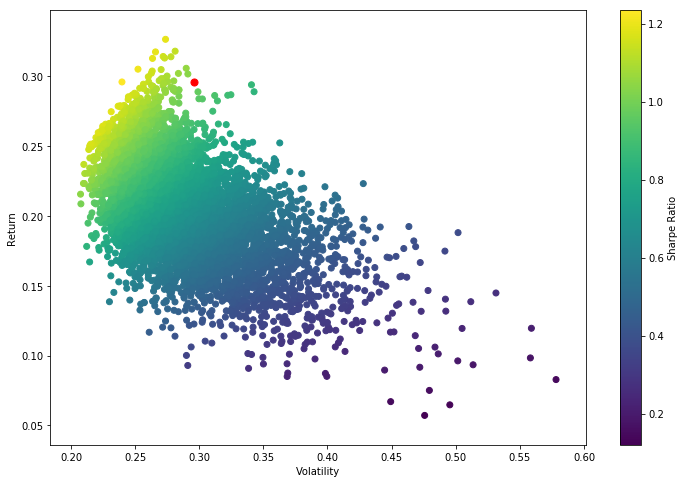

In [20]:

plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
plt.show()

In [21]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_rtn.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_rtn.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

Moving on, we will need to create a variable to include our constraints like the check_sum. We’ll also define an initial guess and specific bounds, to help the minimization be faster and more efficient. Our initial guess will be 25% for each stock (or 0.25), and the bounds will be a tuple (0,1) for each stock, since the weight can range from 0 to 1

In [22]:
cons = ({'type':'eq', 'fun':check_sum})
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1) )
init_guess = [0.1429,0.1429,0.1429,0.1429,0.1429,0.1429,0.1426]

In [23]:
# minimize 
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
print(opt_results)
#  ['AAPL','AMZN','GLOB','HES','KL','NFLX','NJR']

     fun: -1.270951885026993
     jac: array([-1.24067068e-04, -2.17303634e-04,  5.64903021e-05,  7.40242630e-01,
        4.63785917e-01, -5.52579761e-04,  5.16369939e-04])
 message: 'Optimization terminated successfully.'
    nfev: 74
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([2.24818149e-01, 1.35132249e-01, 4.08375710e-01, 0.00000000e+00,
       2.18476174e-17, 7.99160846e-02, 1.51757808e-01])


In [24]:
get_ret_vol_sr(opt_results.x)
# return, volatility, and sharpe ratio

array([0.30716073, 0.2416777 , 1.27095189])

In [25]:
frontier_y = np.linspace(0,.43,500)

In [26]:
def minimize_volatility(weights):
    return(get_ret_vol_sr(weights))[1]

In [27]:
frontier_x = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])

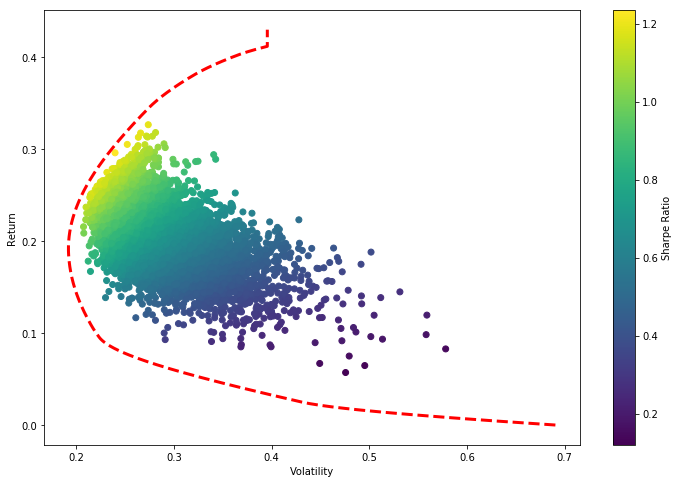

In [28]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_x,frontier_y, 'r--', linewidth=3)
plt.savefig('cover.png')
plt.show()



In [33]:
get_ret_vol_sr(opt_results.x)
# return, volatility, and sharpe ratio

array([0.30716073, 0.2416777 , 1.27095189])

In [34]:
#  ['AAPL','AMZN','GLOB','HES','KL','NFLX','NJR']
# Optimal weights
print(all_weights[Arr,:])

[0.23167667 0.08515043 0.32916897 0.00382441 0.00201731 0.17702898
 0.17113323]


https://towardsdatascience.com/python-markowitz-optimization-b5e1623060f5